In [152]:
import time

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
import random
import tabulate

In [153]:
import sys

print(sys.version)

3.11.5 (tags/v3.11.5:cce6ba9, Aug 24 2023, 14:38:34) [MSC v.1936 64 bit (AMD64)]


In [154]:
import tensorflow as tf

print(tf.__version__)

2.14.0


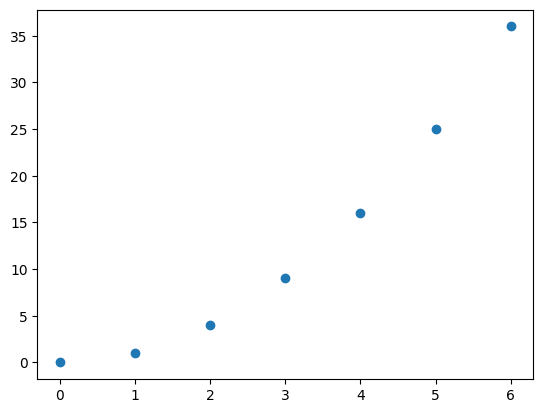

In [155]:
import matplotlib.pyplot as plt
import numpy as np

figure = plt.figure()
axes = figure.add_subplot()

x = np.array([0, 1, 2, 3, 4, 5, 6])
y = np.array([0, 1, 4, 9, 16, 25, 36])

axes.scatter(x, y)

In [156]:
def get_datos():
    iris = load_iris()

    sepal_length = iris.data[0:99, 0]
    petal_length = iris.data[0:99, 2]
    flower_type = iris.target[0:99]

    x = np.column_stack((sepal_length, petal_length))
    y = flower_type

    return x, y

In [157]:
def compile_fit(layers_epochs, model_x, model_y):
    tf.keras.utils.set_random_seed(5)

    layers = layers_epochs[0]
    epochs = layers_epochs[1]

    model = Sequential()

    number_of_columns = len(model_x[0])

    for idx, layer in enumerate(layers):
        if idx == 0:
            model.add(Dense(layer, activation='relu', input_dim=number_of_columns))
        elif idx == (len(layers) - 1):
            model.add(Dense(layer, activation='sigmoid'))
        else:
            model.add(Dense(layer, activation='relu'))

    model.compile(loss='mean_squared_error')

    timestamp_before = time.time_ns()
    model_history = model.fit(model_x, model_y, epochs=epochs, verbose=False)
    timestamp_after = time.time_ns()

    return {
        "model": model,
        "elapsed_time": (timestamp_after - timestamp_before) / 1_000_000_000,
        "history": model_history
    }

In [158]:
x, y = get_datos()

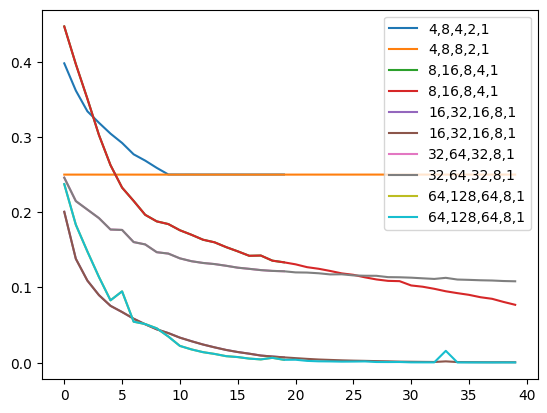

In [159]:
results = []

neuronal_nets = [
    [[4, 8, 4, 2, 1], 20],
    [[4, 8, 8, 2, 1], 40],
    [[8, 16, 8, 4, 1], 20],
    [[8, 16, 8, 4, 1], 40],
    [[16, 32, 16, 8, 1], 20],
    [[16, 32, 16, 8, 1], 40],
    [[32, 64, 32, 8, 1], 20],
    [[32, 64, 32, 8, 1], 40],
    [[64, 128, 64, 8, 1], 20],
    [[64, 128, 64, 8, 1], 40],
]

for net in neuronal_nets:
    model_performance = compile_fit(net, x, y)
    model = model_performance["model"]
    time_taken = model_performance["elapsed_time"]
    history = model_performance["history"]

    prediction_result = model.predict([[4.9, 1.4], [6.3, 4.9]], verbose=False)

    indexed_result = [
        (','.join(map(str, net[0]))),
        net[1],
        history.history['loss'][0],
        history.history['loss'][len(history.history['loss']) // 2],
        history.history['loss'][-1],
        round(time_taken, 2)
    ]

    results.append(indexed_result)
    plt.plot(range(len(history.history['loss'])), history.history['loss'], label=(','.join(map(str, net[0]))))
    plt.legend()

plt.show()

In [160]:
print(tabulate.tabulate(results, headers=["Red", "Epocas", "loss Principio", "loss Mitad", "loss Final", "Tiempo (s)"]))

Red              Epocas    loss Principio    loss Mitad    loss Final    Tiempo (s)
-------------  --------  ----------------  ------------  ------------  ------------
4,8,4,2,1            20          0.397945    0.25017      0.250176             0.48
4,8,8,2,1            40          0.250035    0.250031     0.250061             0.49
8,16,8,4,1           20          0.44695     0.176068     0.13342              0.41
8,16,8,4,1           40          0.44695     0.130781     0.0769626            0.47
16,32,16,8,1         20          0.200601    0.0332978    0.00709074           0.42
16,32,16,8,1         40          0.200601    0.00606016   0.000590617          0.47
32,64,32,8,1         20          0.245983    0.138697     0.121533             0.43
32,64,32,8,1         40          0.245983    0.120045     0.108217             0.5
64,128,64,8,1        20          0.237395    0.0223126    0.00382098           0.42
64,128,64,8,1        40          0.237395    0.0039471    0.000299676        